Importamos las librerías 

In [19]:
import pandas as pd
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

Importamos los datos

In [2]:
fake= pd.read_csv('Fake.csv')
true= pd.read_csv('True.csv')

In [27]:
# Variables de los nombres de las columnas

TITLE = 'title'
TEXT= 'text'
SUBJECT = 'subject'
DATE = 'date'

## Wordclouds 

In [24]:
# Texto noticias falsas
FAKE_TEXT = []
for i in fake.index:
    FAKE_TEXT.append(fake[TEXT][i])

# Texto noticias verdaderas
TRUE_TEXT = []
for i in true.index:
    TRUE_TEXT.append(true[TEXT][i])
    
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

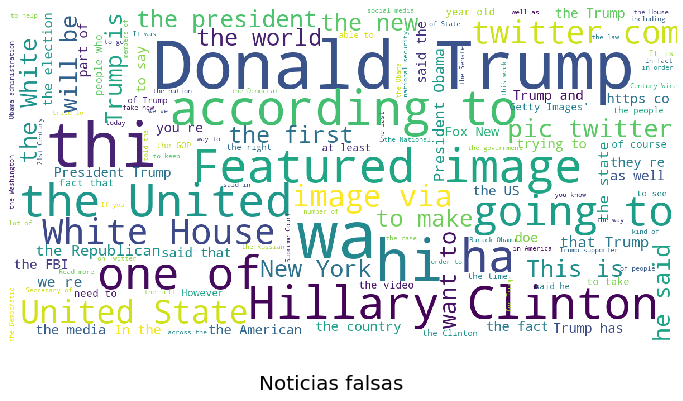

In [25]:
show_wordcloud(FAKE_TEXT, title= 'Noticias falsas')


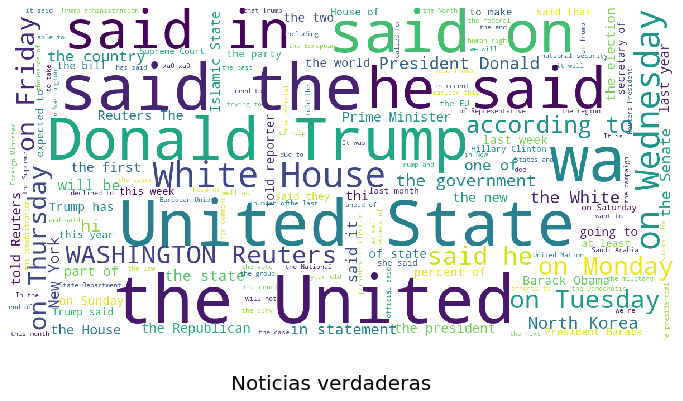

In [26]:
show_wordcloud(TRUE_TEXT, title= 'Noticias verdaderas')


In [28]:
# Titulares noticias falsas
FAKE_TITLE = []
for i in fake.index:
    FAKE_TITLE.append(fake[TITLE][i])

# Texto noticias verdaderas
TRUE_TITLE = []
for i in true.index:
    TRUE_TITLE.append(true[TITLE][i])

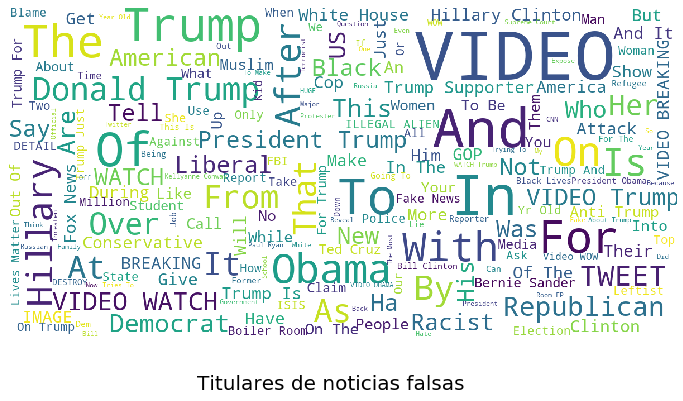

In [32]:
show_wordcloud(FAKE_TITLE, title= 'Titulares de noticias falsas')

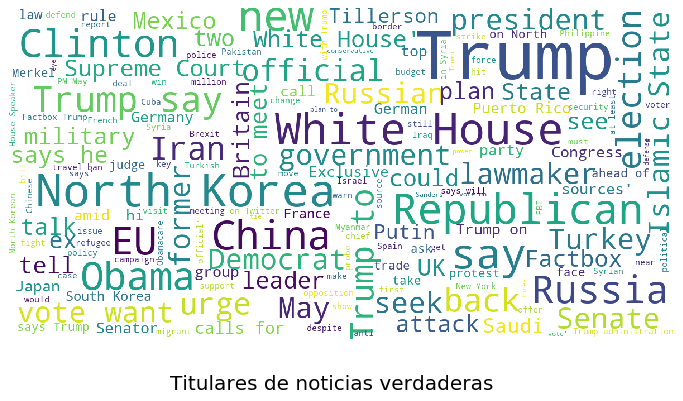

In [33]:
show_wordcloud(TRUE_TITLE, title= 'Titulares de noticias verdaderas')

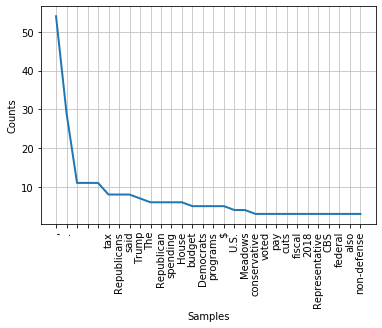

In [7]:
# Separar en palabras
text= true['text']
fake_text= []
for i in fake.index[:10]:
    fake_text.append(text[i])
tokenized_word=word_tokenize(fake_text[0])

# Quitar stopwords
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

# Graficar
fdist = FreqDist(filtered_word) 
fdist.most_common(2)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()


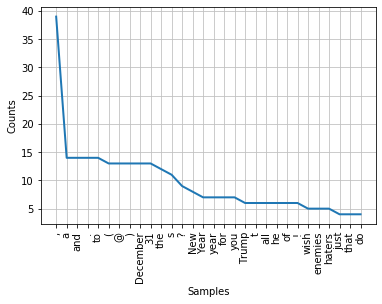

In [44]:
text= fake['text']
fake_text= []
for i in fake.index[:10]:
    fake_text.append(text[i])
tokenized_word=word_tokenize(fake_text[0])
fdist = FreqDist(tokenized_word) 
fdist.most_common(2)
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()
